<a href="https://colab.research.google.com/github/ArtytheCoder/HR-Attrition/blob/main/Employee.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Importing all the libraries
import numpy as np
import pandas as pd
import seaborn as sns
pd.set_option('display.max_rows',500)
pd.set_option('display.max_columns',500)
pd.set_option('display.width',500)
%matplotlib inline
import matplotlib.pyplot as plt
#https://www.kaggle.com/code/nowiecruz/employee-attrition-comprehensive-eda-and-modeling

In [ ]:
data = pd.read_csv("/content/HR Employee Attrition.csv")
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [ ]:
#get the number of rows and columns
data.shape

(1470, 35)

In [ ]:
#get the data types of the column
data.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

In [ ]:
#get the count of empty values for each column
data.isna().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [ ]:
#check foe missing values and zero values
data.isnull().values.any()

False

In [ ]:
#view some stats
data.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,14313.103401,2.693197,15.209524,3.153741,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,1.102846,4707.956783,7117.786044,2.498009,3.659938,0.360824,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,8047.000000,1.000000,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,14235.500000,2.000000,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,4.000000,8379.000000,20461.500000,4.000000,18.000000,3.000000,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [ ]:
data.Attrition.value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

**Employee Attrition Distribution in the comapny**

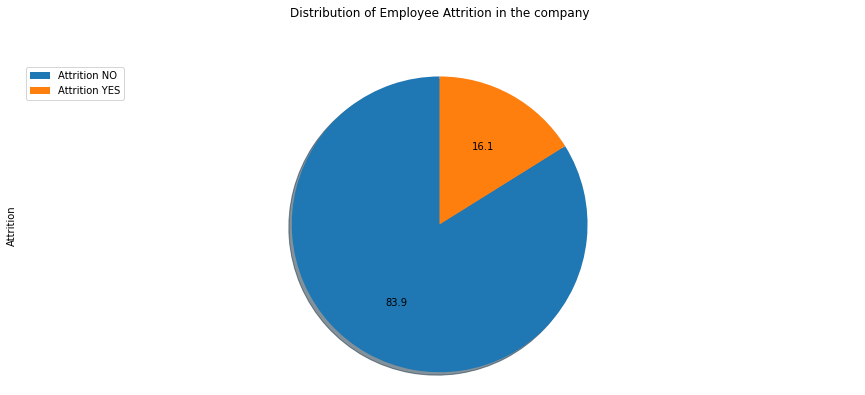

In [ ]:
labels = 'Attrition NO','Attrition YES'
data['Attrition'].astype(str).value_counts().plot(kind='pie',figsize=(15,6),
                                                  autopct='%1.1f',startangle=90,
                                                  shadow=True,labels=None,)
plt.title('Distribution of Employee Attrition in the company', y=1.12)
plt.axis('equal')
plt.legend(labels=labels, loc='upper left')
plt.show()

**Feature Analysis**

In [ ]:
#removing useless features that are standard hours, employee count, over 18 , Employee number, stock option level
data.drop(columns=['StandardHours','EmployeeCount','Over18','EmployeeNumber','StockOptionLevel'],inplace=True)
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Yes,11,3,1,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,No,23,4,4,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Yes,15,3,2,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Yes,11,3,3,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,No,12,3,4,6,3,3,2,2,2,2


In [ ]:
data.shape

(1470, 30)

Analysis of the Rating Features

    JobSatisfaction
    EnvironmentSatisfaction
    RelationshipSatisfaction
    JobInvolvement
    WorkLifeBalance
    PerformanceRating

In [ ]:
data['JobSatisfaction'].value_counts()


4    459
3    442
1    289
2    280
Name: JobSatisfaction, dtype: int64

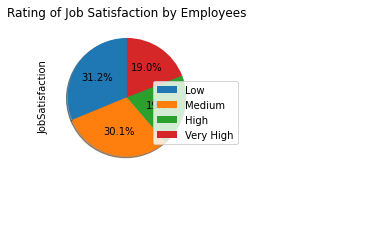

In [ ]:
fig = plt.figure()

ax1 = fig.add_subplot(221)
labels = 'Low','Medium','High','Very High'

data['JobSatisfaction'].astype(str).value_counts().plot(kind='pie',
                            figsize=(15, 6),
                            autopct='%1.1f%%',
                            startangle=90,
                            shadow=True,
                            labels=None,ax=ax1) # add to subplot 2
ax1.set_title ('Rating of Job Satisfaction by Employees')
fig.legend(labels=labels,loc='center')

Text(0.5, 1.0, 'Rating of Environmental Satisfaction by Employees')

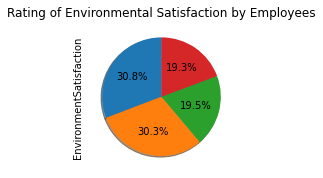

In [ ]:
fig = plt.figure()

ax2 = fig.add_subplot(222)
labels = 'Low','Medium','High','Very High'
data['EnvironmentSatisfaction'].astype(str).value_counts().plot(kind='pie',
                            figsize=(15, 6),
                            autopct='%1.1f%%',
                            startangle=90,
                            shadow=True,
                            labels=None,ax=ax2)
ax2.set_title('Rating of Environmental Satisfaction by Employees')

Text(0.5, 1.0, 'Rating of Relationship Satisfaction by Employees')

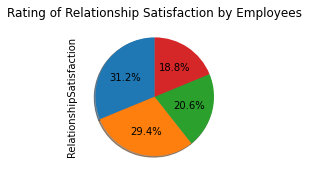

In [ ]:
fig = plt.figure()

ax3 = fig.add_subplot(223)
labels = 'Low','Medium','High','Very High'
data['RelationshipSatisfaction'].astype(str).value_counts().plot(kind='pie',
                            figsize=(15, 6),
                            autopct='%1.1f%%',
                            startangle=90,
                            shadow=True,
                            labels=None,ax=ax3)
ax3.set_title('Rating of Relationship Satisfaction by Employees')

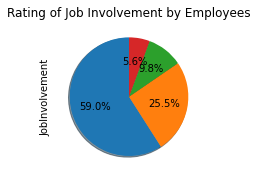

In [ ]:
fig = plt.figure()

ax4 = fig.add_subplot(224)
labels = 'Low','Medium','High','Very High'
data['JobInvolvement'].astype(str).value_counts().plot(kind='pie',
                            figsize=(15, 6),
                            autopct='%1.1f%%',
                            startangle=90,
                            shadow=True,
                            labels=None,ax=ax4)
ax4.set_title('Rating of Job Involvement by Employees')

plt.show()

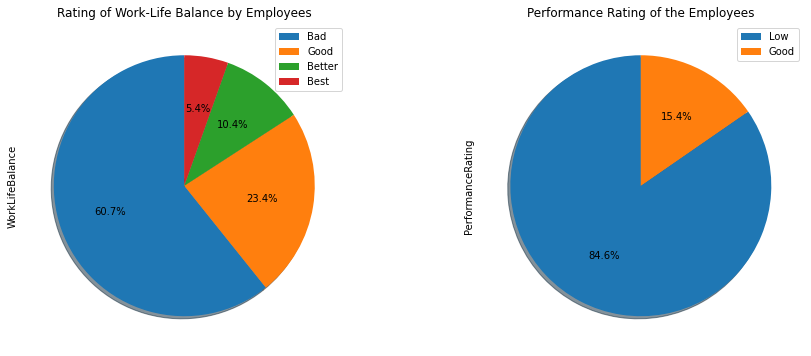

In [ ]:
fig2 = plt.figure()

ax5 = fig2.add_subplot(121)
ax6 = fig2.add_subplot(122)

labels_list1 = 'Bad','Good','Better','Best'
labels_list2 = 'Low','Good','Excellent','Outstanding'

data['WorkLifeBalance'].astype(str).value_counts().plot(kind='pie',
                            figsize=(15, 6),
                            autopct='%1.1f%%',
                            startangle=90,
                            shadow=True,
                            labels=None,ax=ax5) # add to subplot 2
ax5.set_title ('Rating of Work-Life Balance by Employees')
ax5.legend(labels=labels_list1,loc='upper right')

data['PerformanceRating'].astype(str).value_counts().plot(kind='pie',
                            figsize=(15, 6),
                            autopct='%1.1f%%',
                            startangle=90,
                            shadow=True,
                            labels=None,ax=ax6)
ax6.set_title('Performance Rating of the Employees')
ax6.legend(labels=labels_list2,loc='upper right')

plt.show()

Analysis Of Business Traval **Feature**

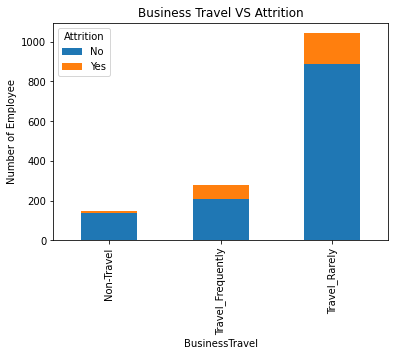

In [ ]:
props = data.groupby("BusinessTravel")['Attrition'].value_counts(normalize=False).unstack()

props.plot(kind='bar', alpha=1, stacked='False')

plt.title('Business Travel VS Attrition')
plt.ylabel('Number of Employee')
plt.show()

Analysis Of Work Experience


    YearsAtCompany
    YearsInCurrentRole
    YearsSinceLastPromotion
    YearsWithCurrManager
    TotalWorkingYears

In [ ]:
we = data[['YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager', 'TotalWorkingYears', 'Attrition']]
we.head()


,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,TotalWorkingYears,Attrition
0,6,4,0,5,8,Yes
1,10,7,1,7,10,No
2,0,0,0,0,7,Yes
3,8,7,3,0,8,No
4,2,2,2,2,6,No


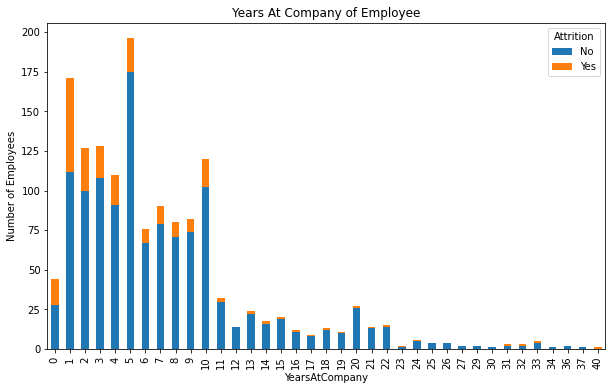

In [ ]:
yac = data.groupby("YearsAtCompany")['Attrition'].value_counts(normalize=False).unstack()

yac.plot(kind='bar', stacked='False',figsize=(10,6))

plt.title('Years At Company of Employee')
plt.ylabel('Number of Employees')
plt.show()

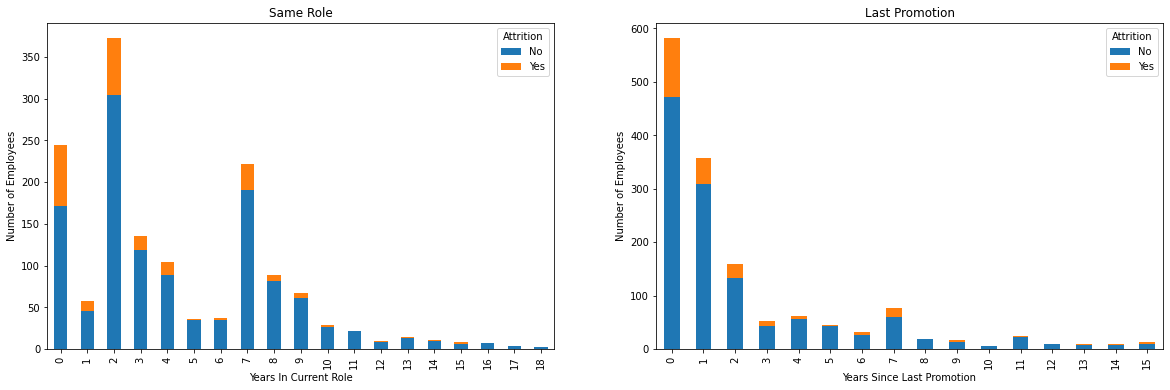

In [ ]:
ycr = data.groupby("YearsInCurrentRole")['Attrition'].value_counts(normalize=False).unstack()
ysp = data.groupby("YearsSinceLastPromotion")['Attrition'].value_counts(normalize=False).unstack()


fig = plt.figure() # create figure

ax0 = fig.add_subplot(121) # add subplot 1 (1 row, 2 columns, first plot)
ax1 = fig.add_subplot(122) # add subplot 2 (1 row, 2 columns, second plot). See tip below**

# Subplot 1: Box plot
ycr.plot(kind='bar', stacked='False',figsize=(20,6), ax=ax0) # add to subplot 1
ax0.set_title('Same Role')
ax0.set_xlabel('Years In Current Role')
ax0.set_ylabel('Number of Employees')

# Subplot 2: Line plot
ysp.plot(kind='bar', stacked='False',figsize=(20,6), ax=ax1) # add to subplot 2
ax1.set_title ('Last Promotion')
ax1.set_ylabel('Number of Employees')
ax1.set_xlabel('Years Since Last Promotion')

plt.show()


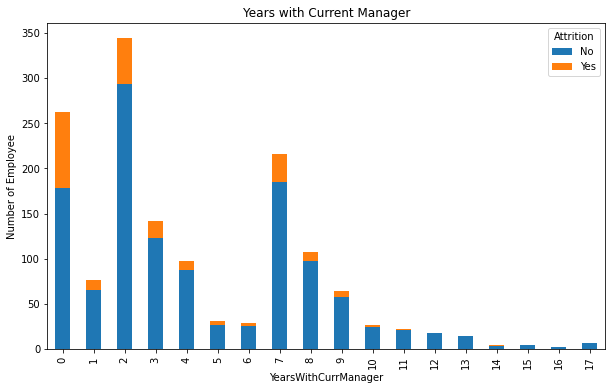

In [ ]:
ycm = data.groupby("YearsWithCurrManager")['Attrition'].value_counts(normalize=False).unstack()

ycm.plot(kind='bar', stacked='False',figsize=(10,6))

plt.title('Years with Current Manager')
plt.ylabel('Number of Employee')
plt.show()

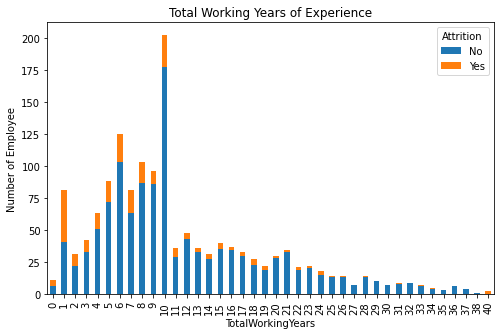

In [ ]:
twy = data.groupby("TotalWorkingYears")['Attrition'].value_counts(normalize=False).unstack()

twy.plot(kind='bar', stacked='False',figsize=(8,5))

plt.title('Total Working Years of Experience')
plt.ylabel('Number of Employee')
plt.show()

Analysis Of Monthly Income

In [ ]:
mi = data[data['Attrition']=='Yes']['MonthlyIncome']
mi = mi.reset_index()
mi.drop(['index'], axis=1, inplace=True)


mn = data[data['Attrition']=='No']['MonthlyIncome']
mn = mn.reset_index()
mn.drop(['index'], axis=1, inplace=True)

mi['mn'] = mn
mi.rename(columns={'MonthlyIncome':'Yes', 'mn':'No'}, inplace=True)
mi.head()

,Yes,No
0,5993,5130
1,2090,2909
2,2028,3468
3,3407,3068
4,2960,2670


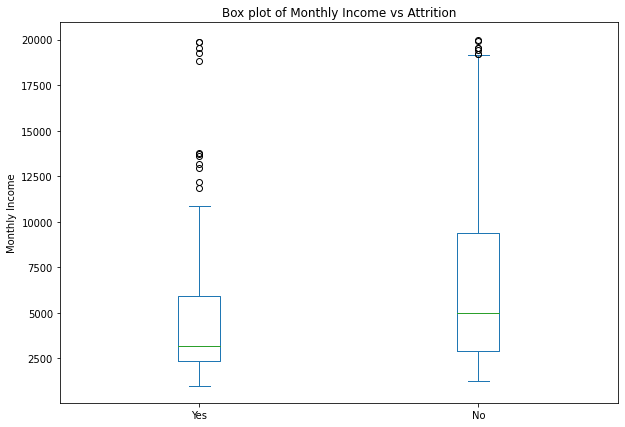

In [ ]:
mi.plot(kind='box', figsize=(10, 7))

plt.title('Box plot of Monthly Income vs Attrition')
plt.ylabel('Monthly Income')

plt.show()

Over Time Employee Analysis

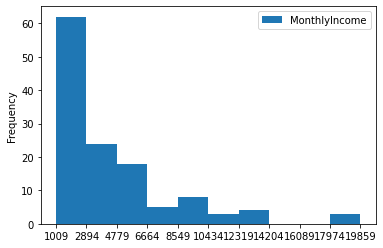

In [ ]:
dot = data[['OverTime', 'MonthlyIncome', 'Attrition']]
oyay = dot[(data['OverTime']=='Yes') & (data['Attrition']=='Yes')]
oyay = oyay.sort_values(by = 'MonthlyIncome', ascending=False, axis=0) #sorting to get the top values
count, bin_edges = np.histogram(oyay['MonthlyIncome'])

oyay.plot(kind='hist', xticks=bin_edges)


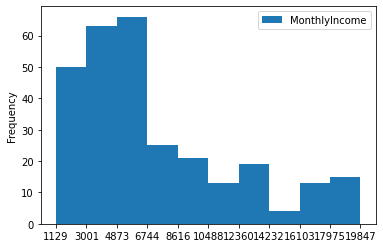

In [ ]:
oyan = dot[(data['OverTime']=='Yes') & (data['Attrition']=='No')]
count, bin_edges = np.histogram(oyan['MonthlyIncome'])

oyan.plot(kind='hist', xticks=bin_edges)

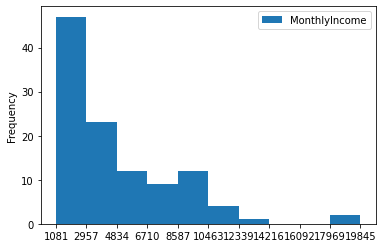

In [ ]:
onay = dot[(data['OverTime']=='No') & (data['Attrition']=='Yes')]
count, bin_edges = np.histogram(onay['MonthlyIncome'])

onay.plot(kind='hist', xticks=bin_edges)

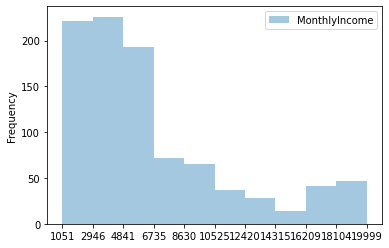

In [ ]:
onan = dot[(data['OverTime']=='No') & (data['Attrition']=='No')]
count, bin_edges = np.histogram(onan['MonthlyIncome'])

onan.plot(kind='hist',alpha =0.4, xticks=bin_edges)


Department Analysis

In [ ]:
dpt = data[['Department','Attrition']]
dpt.head()

,Department,Attrition
0,Sales,Yes
1,Research & Development,No
2,Research & Development,Yes
3,Research & Development,No
4,Research & Development,No


In [ ]:
dpt['Department'].value_counts()


Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64

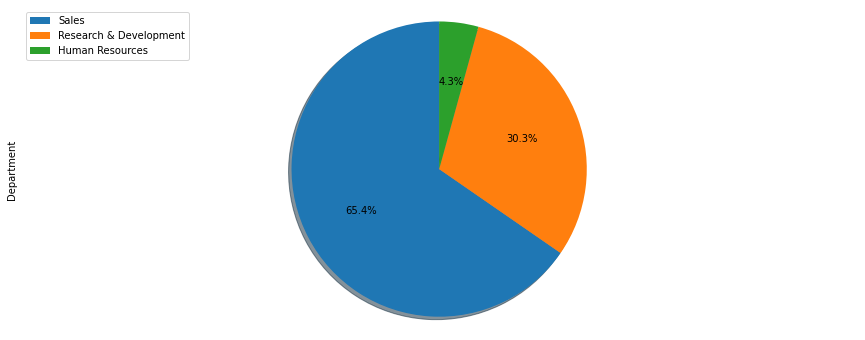

In [ ]:
dpt['Department'].value_counts().plot(kind='pie',
                            figsize=(15, 6),
                            autopct='%1.1f%%',
                            startangle=90,
                            shadow=True,
                            labels=None)
plt.axis('equal')
plt.legend(labels=dpt['Department'].unique(), loc='upper left')


In [ ]:
dpm = data.groupby("Department")['Attrition'].value_counts(normalize=False).unstack()
dpm = dpm.transpose()
dpm

Department,Human Resources,Research & Development,Sales
Attrition,,,
No,51,828,354
Yes,12,133,92


Gender Analysis

In [ ]:
gda = data[['Gender', 'DistanceFromHome', 'Attrition']]
gda.head()


,Gender,DistanceFromHome,Attrition
0,Female,1,Yes
1,Male,8,No
2,Male,2,Yes
3,Female,3,No
4,Male,2,No


In [ ]:
gda['Gender'].value_counts()

Male      882
Female    588
Name: Gender, dtype: int64

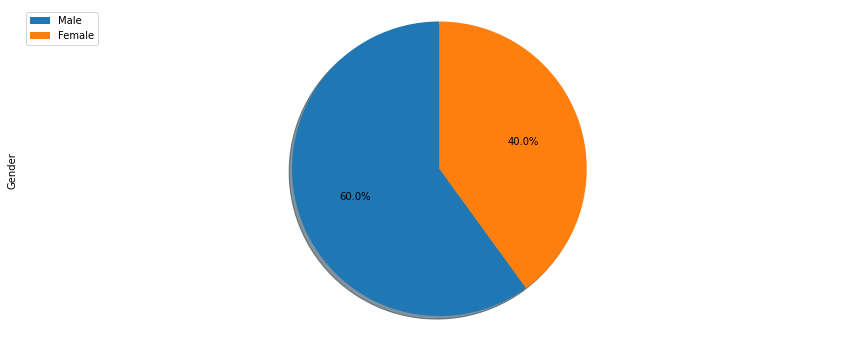

In [ ]:
gda['Gender'].value_counts().plot(kind='pie',
                            figsize=(15, 6),
                            autopct='%1.1f%%',
                            startangle=90,
                            shadow=True,
                            labels=None)
plt.axis('equal')
plt.legend(labels=['Male', 'Female'], loc='upper left')


In [ ]:
fma = gda.groupby("Gender")['Attrition'].value_counts(normalize=False).unstack()
fma = fma.transpose()
fma

Gender,Female,Male
Attrition,,
No,501,732
Yes,87,150


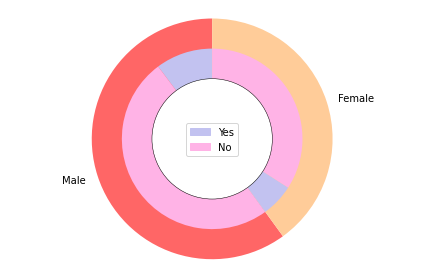

In [ ]:
labels = ['Male', 'Female']
sizes = [882,588]
labels_attrition = ['Yes','No','Yes','No']
sizes_attrition = [150,732,87,501]
colors = ['#ff6666', '#ffcc99']

colors_attrition = ['#c2c2f0','#ffb3e6', '#c2c2f0','#ffb3e6']

# Plot
plt.pie(sizes, labels=labels, colors=colors, startangle=90,frame=True)
plt.pie(sizes_attrition,colors=colors_attrition,radius=0.75,startangle=90)
centre_circle = plt.Circle((0,0),0.5,color='black', fc='white',linewidth=0.5)
fig6 = plt.gcf()
fig6.gca().add_artist(centre_circle)

#legend
import matplotlib.patches as mpatches
pur = mpatches.Patch(color='#c2c2f0', label='Yes')
pin = mpatches.Patch(color='#ffb3e6', label='No')
plt.legend(handles=[pur, pin], loc='center')

plt.axis('equal')
plt.tight_layout()
plt.show()

Marital Status

In [ ]:
ms = data[['MaritalStatus', 'Attrition']]
ms.head()

,MaritalStatus,Attrition
0,Single,Yes
1,Married,No
2,Single,Yes
3,Married,No
4,Married,No


In [ ]:
ms['MaritalStatus'].value_counts()

Married     673
Single      470
Divorced    327
Name: MaritalStatus, dtype: int64

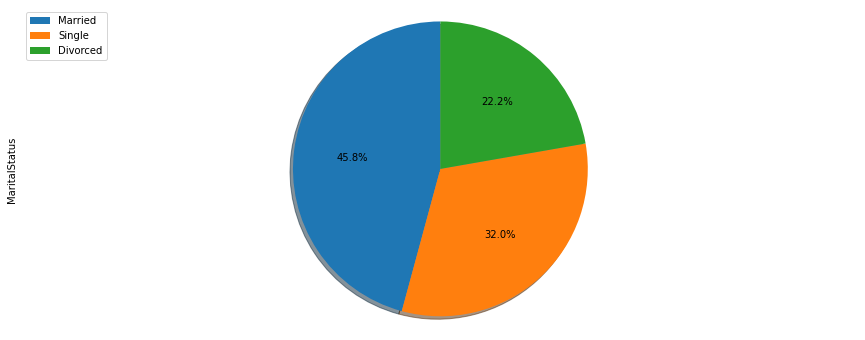

In [ ]:
ms['MaritalStatus'].value_counts().plot(kind='pie',
                            figsize=(15, 6),
                            autopct='%1.1f%%',
                            startangle=90,
                            shadow=True,
                            labels=None)
plt.axis('equal')
plt.legend(labels=['Married', 'Single', 'Divorced'], loc='upper left')

In [ ]:
msa = ms.groupby("MaritalStatus")['Attrition'].value_counts(normalize=False).unstack()
msa = msa.transpose()
msa

MaritalStatus,Divorced,Married,Single
Attrition,,,
No,294,589,350
Yes,33,84,120


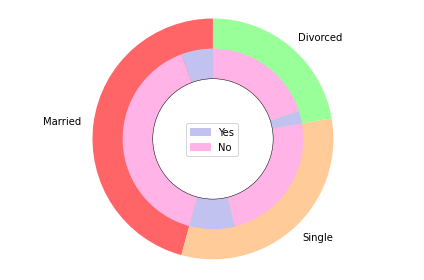

In [ ]:
labels = ['Married', 'Single', 'Divorced']
sizes = [673, 470, 327]
labels_attrition = ['Yes','No','Yes','No','Yes','No']
sizes_attrition = [84,589,120,350,33,294]
colors = ['#ff6566', '#ffcc99', '#99ff99']

colors_attrition = ['#c2c2f0','#ffb3e6', '#c2c2f0','#ffb3e6', '#c2c2f0','#ffb3e6']

# Plot
plt.pie(sizes, labels=labels, colors=colors, startangle=90,frame=True)
plt.pie(sizes_attrition,colors=colors_attrition,radius=0.75,startangle=90)
centre_circle = plt.Circle((0,0),0.5,color='black', fc='white',linewidth=0.5)
fig6 = plt.gcf()
fig6.gca().add_artist(centre_circle)

#legend
import matplotlib.patches as mpatches
pur = mpatches.Patch(color='#c2c2f0', label='Yes')
pin = mpatches.Patch(color='#ffb3e6', label='No')
plt.legend(handles=[pur, pin], loc='center')

plt.axis('equal')
plt.tight_layout()
plt.show()
